In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from os.path import join

plt.style.use(["seaborn", "thesis"])

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#plt.rcParams()

# Dataset 

In [3]:
from SCFInitialGuess.utilities.dataset import ScreenedData

target = "P"

data = ScreenedData(r_max=10)

data.include(data_path = "../../dataset/MethanT/", postfix = "MethanT", target=target)
data.include(data_path = "../../dataset/MethanT2/", postfix = "MethanT2", target=target)
data.include(data_path = "../../dataset/MethanT3/", postfix = "MethanT3", target=target)
data.include(data_path = "../../dataset/MethanT4/", postfix = "MethanT4", target=target)

data.include(data_path = "../../dataset/EthanT/",  postfix = "EthanT", target=target)
data.include(data_path = "../../dataset/EthanT2/", postfix = "EthanT2", target=target)
data.include(data_path = "../../dataset/EthanT3/", postfix = "EthanT3", target=target)
data.include(data_path = "../../dataset/EthanT4/",  postfix = "EthanT4", target=target)
data.include(data_path = "../../dataset/EthanT5/",  postfix = "EthanT5", target=target)
data.include(data_path = "../../dataset/EthanT6/",  postfix = "EthanT6", target=target)

data.include(data_path = "../../dataset/EthenT/",  postfix = "EthenT", target=target)
data.include(data_path = "../../dataset/EthenT2/", postfix = "EthenT2", target=target)
data.include(data_path = "../../dataset/EthenT3/", postfix = "EthenT3", target=target)
data.include(data_path = "../../dataset/EthenT4/",  postfix = "EthenT4", target=target)
data.include(data_path = "../../dataset/EthenT5/",  postfix = "EthenT5", target=target)
data.include(data_path = "../../dataset/EthenT6/",  postfix = "EthenT6", target=target)


data.include(data_path = "../../dataset/EthinT/",  postfix = "EthinT", target=target)
data.include(data_path = "../../dataset/EthinT2/", postfix = "EthinT2", target=target)
data.include(data_path = "../../dataset/EthinT3/", postfix = "EthinT3", target=target)

#data.include(data_path = "../../dataset/QM9/", postfix = "QM9-300")

In [3]:
from SCFInitialGuess.utilities.dataset import StaticDataset

dataset = StaticDataset(
    #train=(s_train, p_train),
    train=(data.S[0], data.T[0]),
    validation=(data.S[1], data.T[1]),
    test=(data.S[2], data.T[2]),
    mu=0,
    std=1
)

# Find molecules and Reference
find all samples that are ethene molecules. (ethene has dim 72)

In [4]:
indices = [i for (i, mol) in enumerate(data.molecules[2])  if mol.dim == 72 ]

In [22]:
reference = np.array(data.T[2])[indices]
reference = np.array([r.reshape(72, 72) for r in reference])
reference.reshape(-1, 72, 72)
reference.shape

(735, 72, 72)

# Fetch precalculated data 

In [34]:
p_sannd_center = np.load("data/p_nn.npy")[indices]
p_sannd_center = np.array([p.reshape(72, 72) for p in p_sannd_center])
p_sannd_center.shape

(735, 72, 72)

In [35]:
p_sannd_full = np.load("data/p_nn_full_sannd.npy")[indices]
p_sannd_full = np.array([p.reshape(72, 72) for p in p_sannd_full])
p_sannd_full.shape

(735, 72, 72)

# Calculate Error 

In [36]:
e_center = np.mean(np.abs(reference - p_sannd_center), 0)
e_center.shape

(72, 72)

In [37]:
e_full = np.mean(np.abs(reference - p_sannd_full), 0)
e_full.shape

(72, 72)

# Plot 

In [39]:
plt.rcParams['figure.figsize'] = (8, 4)

In [43]:
export_folder = "/home/jo/Repos/MastersThesis/Application/figures/"

In [48]:
vmin = 0
vmax = 0.05

ylabel = r"Row Index / 1"
xlabel = r"Column Index / 1"

norm = plt.Normalize(vmin, vmax)

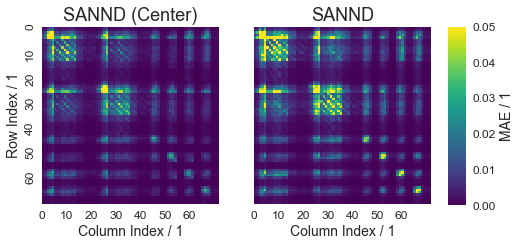

In [49]:
fig, axes = plt.subplots(1, 2)#, sharex=True, sharey=True)
#title_size = 20
#label_size = 15
ticks = np.arange(0,70, 10)

cbar_ax = fig.add_axes([.83, .19, .03, .62])

sns.heatmap(
    e_center, 
    square=True, 
    ax=axes[0], 
    cbar=True, 
    cbar_ax=cbar_ax, 
    cbar_kws={'label': 'MAE / 1'}, 
    cmap="viridis",
    vmin=vmin, 
    vmax=vmax
)
axes[0].set_title("SANND (Center)")#, fontsize=title_size)
axes[0].set_xlabel(xlabel)#, fontsize=title_size)
axes[0].set_ylabel(ylabel)#, fontsize=title_size)
axes[0].set_yticks(ticks)
axes[0].set_xticks(ticks)
axes[0].set_yticklabels(ticks)
axes[0].set_xticklabels(ticks)
#axes[0].tick_params(labelsize=label_size)
#plt.yticks(ticks, ticks)


sns.heatmap(
    e_full, 
    square=True, 
    ax=axes[1], 
    cbar=False, 
    cmap="viridis",
    vmin=vmin, 
    vmax=vmax
)
axes[1].set_title("SANND")#, fontsize=title_size)
#axes[1].ticklabel_format(style='plain', axis='y')
axes[1].set_xlabel(xlabel)#, fontsize=title_size)
#axes[1].tick_params(labelsize=label_size)
axes[1].set_yticks(ticks)
axes[1].set_xticks(ticks)
axes[1].set_yticklabels(ticks)
axes[1].set_xticklabels(ticks)



_ = plt.setp([a.get_yticklabels() for a in [axes[1]]], visible=False)

fig.subplots_adjust(right=0.8)

#cbar_ax.tick_params(labelsize=label_size)
#cbar_ax.set_ylabel('MAE / 1', fontsize=20)

#plt.rcParams["axes.edgecolor"] = "0.15"
#plt.rcParams["axes.linewidth"] = 1.25
#


plt.savefig(export_folder + "SANNDMatrixError.pdf")


In [31]:
ticks

array([ 0, 10, 20, 30, 40, 50, 60])